# FINAL_EXAM 

### ***Phân tích biến động giá cổ phiếu (ADBE)***

## **I.** Thu thập và khái quát về cổ phiếu ADBE của tập đoàn Adobe Inc:

### **1.1.** Khái quát về ADBE:
 Cổ phiếu ADBE đại diện cho Adobe Inc., một công ty phần mềm hàng đầu của Mỹ, nổi tiếng với các sản phẩm như Photoshop, Illustrator, Acrobat và Adobe Creative Cloud. Công ty thuộc nhóm công nghệ lớn (Big Tech) và niêm yết trên sàn NASDAQ. ADBE được đánh giá cao nhờ mô hình kinh doanh thuê bao phần mềm và tăng trưởng doanh thu ổn định.
 ### **1.2.** Thu thập dữ liệu giá cổ phiếu:
 Ta sẽ tải dữ liệu của cổ phiếu ADBE từ Yahoo Finance về (thư viện yfinance).

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
adbe = yf.Ticker("ADBE")
data = adbe.history(period="2y").reset_index()
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0


## **II.** Làm sạch và tiền xử lí dữ liệu:


### **1.0** Kiểm tra và xử lý giá trị thiếu (MISSING VALUES):

Theo như Nasdaq, sàn ADBE tiến hành giao dịch vào các ngày từ thứ 2 đến thứ 6. Với những ngày nghỉ, tổng khối lượng giao dịch (Volume) sẽ bằng 0. Ta tìm và loại bỏ những ngày này.

In [19]:
data = data.dropna()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0


Ngoài ra, trong các phiên giao dịch của ADBE, tồn tại những phiên giao dịch nửa ngày sẽ diễn ra khi Nasdaq đóng cửa sớm lúc 13:00 chiều (ET) thường vào ngày trước hoặc sau các ngày lễ lớn. Phiên này vẫn được tính là giao dịch chính thức nhưng với khối lượng thấp hơn, nên ta sẽ loại bỏ những ngày này

Ở đây chúng ta chỉ phân tích trong vòng 2 năm , từ đây ta có thể suy ra bảng ngày cần loại bỏ như sau:



#####  Danh sách:

| Date       | Event                                | Close Time |
|------------|--------------------------------------|------------|
| 2024-07-03 | Trước ngày Quốc khánh Mỹ             | 13:00 ET   |
| 2024-11-29 | Thứ Sáu sau Lễ Tạ ơn (Black Friday)  | 13:00 ET   |
| 2024-12-24 | Đêm Giáng Sinh (Christmas Eve)       | 13:00 ET   |
| 2023-07-03 | Trước ngày Quốc khánh Mỹ             | 13:00 ET   |
| 2023-11-28 | Thứ Sáu sau Lễ Tạ ơn (Black Friday)  | 13:00 ET   |
| 2023-12-24 | Đêm Giáng Sinh (Christmas Eve)       | 13:00 ET   |



Tiến hành loại bỏ những ngày này khỏi dữ liệu:

In [20]:
Close_time = [
    "2024-07-03", "2024-11-29", "2024-12-24", "2023-07-03", "2023-11-28", "2023-12-24"
]
Close_time = pd.to_datetime(Close_time)

data = data[~data['Date'].isin(Close_time)].copy()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0


### **1.1** Định dạng cột thời gian  (Datetime Formatting):

Đảm bảo cột Date là định dạng "datetime" để phân tích theo thời gian

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0


### **1.2** Kiểm tra trùng lặp (Duplicates):

Việc dữ liệu bị trùng lặp sẽ ảnh hưởng đến việc tính toán dữ liệu trung bình biểu đồ,...

In [22]:
data = data.drop_duplicates()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0


### **1.3** Kiểm tra và loại bỏ bất thường (outliers)

 Outliers (Giá trị ngoại lai) trong dữ liệu tài chính

**Outliers** là những điểm dữ liệu khác biệt rõ rệt so với phần còn lại, thường nằm rất xa trung bình hoặc ngoài vùng phân bố thông thường.

Trong dữ liệu tài chính (ví dụ: cổ phiếu), outliers có thể là:

-  Giá đóng cửa tăng/giảm đột biến bất thường.
-  Khối lượng giao dịch (volume) cực kỳ cao hoặc thấp so với bình thường.
-  Lỗi nhập liệu (ví dụ: giá = 0, hoặc = 99999).

---

Mục đích của việc xử lý outliers:

-  **Cải thiện chất lượng dữ liệu** để các mô hình, biểu đồ, hoặc thống kê không bị sai lệch.
-  **Phát hiện điểm bất thường** – có thể là cơ hội đầu tư hoặc dấu hiệu lỗi dữ liệu.
-  **Làm mượt dữ liệu** giúp các thuật toán nhạy cảm hoạt động ổn định hơn (trung bình, hồi quy, mô hình ML...).


Chúng ta sẽ sử dụng phương pháp **IQR (Interquartile Range)** để phát hiện outliers trong cột `Close`

Trước tiên ta sẽ sắp xếp giá theo chiều từ thấp đến cao cuối ngày

In [23]:
dt1 = data.sort_values("Close")

Ta sẽ tính các tứ phân vị Q1 (25%) ; Q3 (75%) và chỉ số IQR cho cột close

Chỉ số IQR được tính bằng Q3 - Q1

In [24]:
Q1 = dt1["Close"].quantile(0.25)
Q3 = dt1["Close"].quantile(0.75)
IQR = Q3 - Q1

##### Xác định ngưỡng bất thường

Theo lý thuyết IQR, các giá trị ngoại lai sẽ nằm ngoài khoảng:

- *Thấp hơn*: `Q1 - 1.5 × IQR`
- *Cao hơn*: `Q3 + 1.5 × IQR`



In [25]:
lower = Q1 - 1.5 * IQR
upper= Q3 + 1.5 * IQR

Tiến hành loại bỏ outliers ra khỏi dữ liệu:

In [26]:
data = data[(data['Close'] >= lower) & (data['Close'] <= upper)].copy()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0


##### Kết luận sau khi làm sạch dữ liệu

Sau quá trình kiểm tra và xử lý dữ liệu:

- Các dòng có giá trị bị thiếu (NaN) đã được loại bỏ hoặc điền hợp lý.
- Những ngày không giao dịch hoặc phiên giao dịch nửa ngày đã được loại trừ khỏi tập dữ liệu.
- Các giá trị ngoại lai (outliers) trong cột `Close` đã được phát hiện và loại bỏ bằng phương pháp IQR.

Việc làm sạch dữ liệu giúp đảm bảo độ tin cậy cho các phân tích tiếp theo, giảm nhiễu, và phản ánh chính xác hơn xu hướng thực tế của cổ phiếu.


**Do đó, không cần thực hiện thao tác loại bỏ hay xử lí thêm. Dữ liệu đã sẵn sàng để tính toán các chỉ số kỹ thuật và phân tích tiếp theo.**

## **III** Tính toán chỉ số kĩ thuật cơ bản:
### **1.0.** Trung bình động đơn giản **SMA** 
SMA (Simple Moving Average) là đường trung bình động đơn giản, được tính bằng cách lấy trung bình cộng của giá đóng cửa trong một khoảng thời gian nhất định. SMA giúp làm mượt dữ liệu giá và xác định xu hướng chung của thị trường. Phản ứng chậm với biến động ngắn hạn, phù hợp để quan sát xu hướng trung và dài hạn, ở đây chúng ta sẽ tính SMA trong khoảng thời gian 20, 50 ngày

In [27]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0,NaN,NaN
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0,NaN,NaN
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0,NaN,NaN
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0,NaN,NaN
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0,NaN,NaN


##### **1.1.** Trung bình động hàm mũ **EMA** 

EMA (Exponential Moving Average) là đường trung bình động hàm mũ, ưu tiên giá trị gần hiện tại bằng cách gán trọng số cao hơn cho các ngày gần nhất.  
EMA phản ứng nhanh hơn SMA trước các biến động giá, giúp phát hiện tín hiệu mua – bán sớm hơn, thường được dùng trong các chiến lược giao dịch ngắn hạn 

In [28]:
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0,NaN,NaN,485.859985
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0,NaN,NaN,485.061893
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0,NaN,NaN,484.349330
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0,NaN,NaN,484.384632
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0,NaN,NaN,483.920382


##### **1.2.** Chỉ số sức mạnh tương đối **RSI**:

RSI (Relative Strength Index) là chỉ báo đo lường động lượng và mức độ thay đổi giá, dao động trong khoảng từ 0 đến 100.  
RSI thường dùng để xác định vùng quá mua (RSI > 70) hoặc quá bán (RSI < 30), giúp dự đoán khả năng đảo chiều xu hướng.  
Chỉ báo này đặc biệt hữu ích trong các phân tích ngắn hạn để nhận diện điểm vào và thoát lệnh tiềm năng.

In [29]:
difference = data['Close'].diff()

increase = difference.where(difference > 0, 0)
decrease = -difference.where(difference < 0, 0)

avg_increase = increase.rolling(window=14).mean()
avg_decrease = decrease.rolling(window=14).mean()

rsi = 100 - (100 / (1 + (avg_increase / avg_decrease)))
data['RSI'] = rsi
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI
0,2023-06-20 00:00:00-04:00,485.630005,492.690002,480.000000,485.859985,5331200,0.0,0.0,NaN,NaN,485.859985,NaN
1,2023-06-21 00:00:00-04:00,492.000000,495.549988,475.309998,477.480011,5258700,0.0,0.0,NaN,NaN,485.061893,NaN
2,2023-06-22 00:00:00-04:00,474.119995,481.000000,473.019989,477.579987,3601400,0.0,0.0,NaN,NaN,484.349330,NaN
3,2023-06-23 00:00:00-04:00,472.950012,487.329987,472.320007,484.720001,4450200,0.0,0.0,NaN,NaN,484.384632,NaN
4,2023-06-26 00:00:00-04:00,483.010010,487.160004,479.049988,479.510010,3169500,0.0,0.0,NaN,NaN,483.920382,NaN


**Loại bỏ dữ liệu thiếu (NaN)**

Sau khi tính các chỉ báo kỹ thuật như SMA, EMA và RSI, một số dòng đầu tiên trong bộ dữ liệu sẽ chứa giá trị NaN do chưa đủ dữ liệu để tính toán.  
Để đảm bảo quá trình phân tích và trực quan hóa không gặp lỗi, ta sẽ loại bỏ toàn bộ các dòng chứa giá trị thiếu này.


In [31]:
data.dropna(inplace=True)
data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI
49,2023-08-29 00:00:00-04:00,527.700012,541.969971,526.150024,540.570007,2167000,0.0,0.0,521.160500,511.455597,521.966002,62.364984
50,2023-08-30 00:00:00-04:00,540.099976,546.000000,536.090027,545.359985,1930300,0.0,0.0,521.913499,512.645597,524.194000,63.293403
51,2023-08-31 00:00:00-04:00,547.000000,562.099976,546.760010,559.340027,3919300,0.0,0.0,523.692500,514.282797,527.541241,71.624031
52,2023-09-01 00:00:00-04:00,564.799988,569.979980,558.520020,563.210022,2232300,0.0,0.0,525.509001,515.995398,530.938268,69.008726
53,2023-09-05 00:00:00-04:00,557.880005,567.590027,555.419983,564.880005,2349700,0.0,0.0,527.266502,517.598598,534.170814,71.811814


## **IV.** Phân tích dữ liệu:

### **1.0.** Tính lợi suất ngày và phân phối lợi suất:

Lợi suất ngày phản ánh sự thay đổi tương đối của giá đóng cửa so với ngày trước đó.  
Chúng ta sẽ tính lợi suất logarit để dễ phân tích và vẽ biểu đồ histogram nhằm xem phân phối của lợi suất.

Công thức:

rt = ln(Pt/P(t-1))

Trong đó:
- rt : Lợi suất loga tại thời điểm t
- Pt : Giá đóng cửa ngày hôm nay
- P(t-1) : Giá đóng cửa ngày hôm nay


In [32]:
data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

- Phân phối lợi suất bằng Histogram để xem lợi suất nằm trong khoảng nào, phân phối như thế nào.


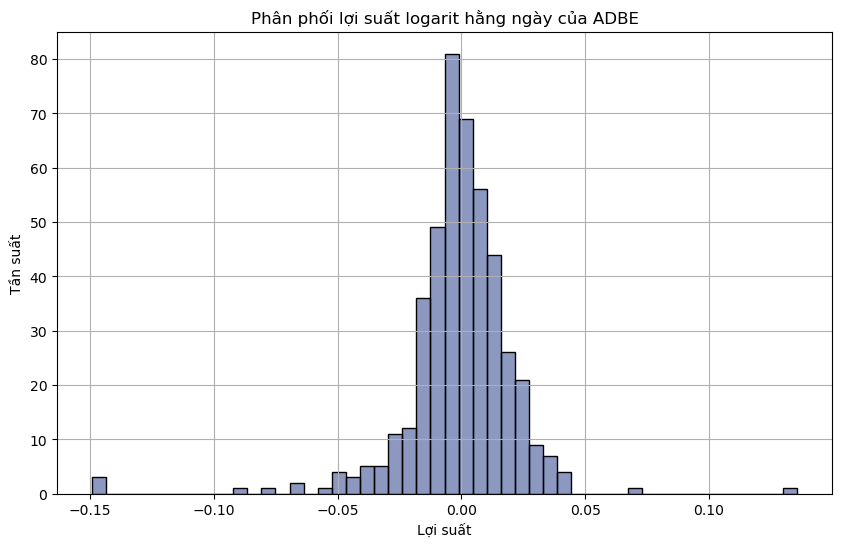

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data['Return'].dropna(), bins=50, color=(0.1, 0.2, 0.5, 0.5), edgecolor='black')
plt.title("Phân phối lợi suất logarit hằng ngày của ADBE")
plt.xlabel("Lợi suất")
plt.ylabel("Tần suất")
plt.grid(True)
plt.show()


Biểu đồ trên minh họa phân phối của lợi suất logarit hằng ngày đối với cổ phiếu ADBE. Một số đặc điểm đáng chú ý:

- Lợi suất phân bố gần giống dạng chuẩn (normal), tập trung nhiều quanh giá trị 0.
- Có sự lệch nhẹ về phía trái (skew trái), với một số ngày có mức giảm mạnh, thể hiện qua các giá trị âm lớn ở bên trái đồ thị.
- Biểu đồ không có nhiều giá trị lợi suất lớn bất thường (bên phải), cho thấy số ngày tăng giá mạnh là ít hơn số ngày giảm sâu.
- Đây là đặc điểm phổ biến ở nhiều cổ phiếu: **rơi nhanh nhưng tăng chậm**, nên phân phối lợi suất thường có đuôi trái dài hơn.

### **1.2** Tính độ biến động (volatility) theo tháng hoặc quý:


Độ biến động được đo bằng `độ lệch chuẩn` của lợi suất ngày.  
Chúng ta sẽ nhóm dữ liệu theo tháng và tính standard deviation để xem biến động của cổ phiếu ADBE qua từng tháng.

In [35]:

monthly_volatility = data.set_index('Date')['Return'].resample('ME').std()


Chúng ta sẽ vẽ biểu đồ thể hiện sự biến động

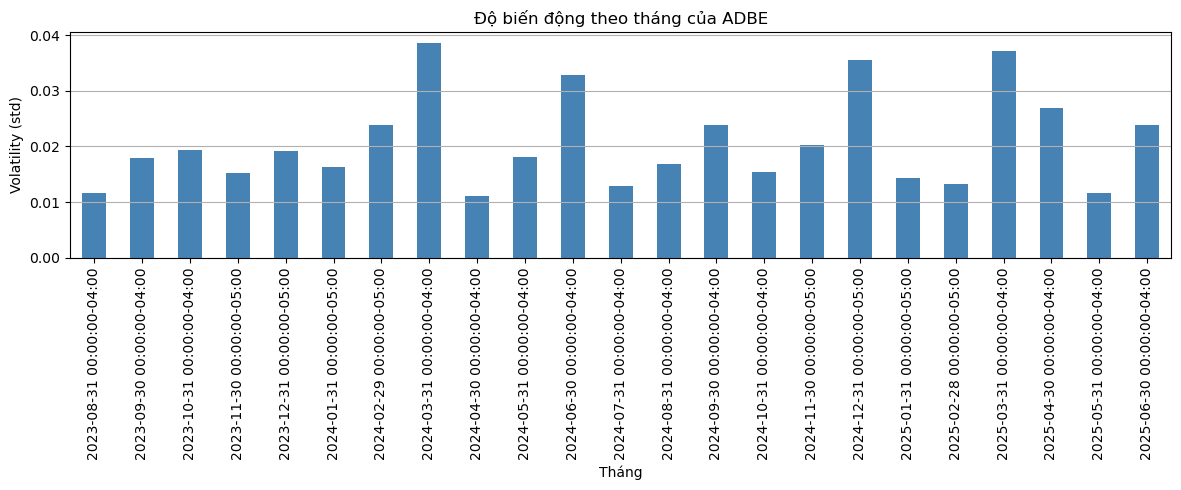

In [36]:
plt.figure(figsize=(12, 5))
monthly_volatility.plot(kind='bar', color='steelblue')
plt.title("Độ biến động theo tháng của ADBE")
plt.xlabel("Tháng")
plt.ylabel("Volatility (std)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### **1.3.**  Phân tích tương quan giữa giá đóng cửa và các chỉ số SMA, RSI.


Chúng ta sẽ tính hệ số tương quan giữa giá đóng cửa và các chỉ báo kỹ thuật như SMA, EMA và RSI.  
Việc này giúp kiểm tra mức độ phụ thuộc giữa các chỉ báo và biến động giá.



In [37]:
correlation_data = data[['Close', 'SMA_20', 'EMA_20', 'RSI']]
corr_matrix = correlation_data.corr()

Chúng ta sẽ thể hiện ma trận tương quan bằng `heatmap` :

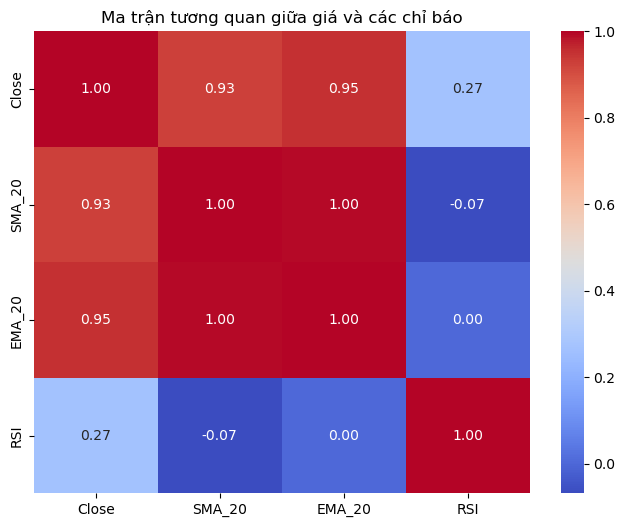

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa giá và các chỉ báo")
plt.show()

-Ma trận tương quan giữa giá đóng cửa và các chỉ số kỹ thuật phản ánh mối liên hệ tuyến tính giữa các biến. Một số nhận xét quan trọng:

- **Giá đóng cửa và các đường trung bình động (SMA_20, EMA_20)**:
  - Với SMA_20: hệ số tương quan ≈ 0.93
  - Với EMA_20: hệ số tương quan ≈ 0.95
  → Điều này là hợp lý vì các đường trung bình động được tính trực tiếp từ giá và phản ánh xu hướng giá trong ngắn hạn.

- **EMA và SMA cũng có tương quan gần như tuyệt đối (≈ 1.00)** do đều dùng cùng chu kỳ 20 ngày và giá biến động ổn định.

- **RSI có tương quan yếu hoặc gần như không có với giá đóng cửa và các đường trung bình**:
  - Với Close: 0.27
  - Với SMA_20: -0.07
  - Với EMA_20: 0.00

→ Điều này phản ánh đúng bản chất của **RSI là một chỉ báo dao động (oscillator)**, không đi theo xu hướng tuyến tính của giá, mà dùng để xác định vùng **quá mua/quá bán**.


## **V.** Trực quan hóa dữ liệu:

### **1.1**  Biểu đồ giá đóng cửa kèm SMA, EMA:

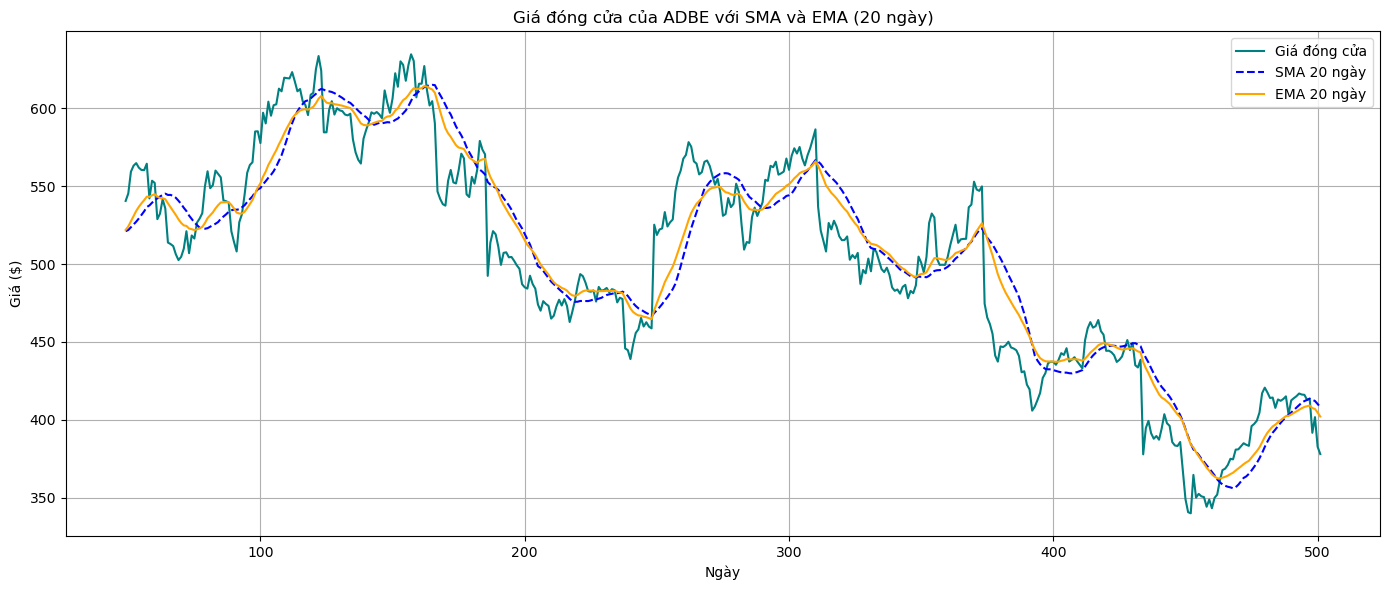

In [43]:
plt.figure(figsize=(14, 6))

plt.plot(data['Close'], label='Giá đóng cửa', color='teal', linewidth=1.5)

plt.plot(data['SMA_20'], label='SMA 20 ngày', color='blue', linestyle='--')
plt.plot(data['EMA_20'], label='EMA 20 ngày', color='orange', linestyle='-')

plt.title('Giá đóng cửa của ADBE với SMA và EMA (20 ngày)')
plt.xlabel('Ngày')
plt.ylabel('Giá ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 1.5.2  Biểu đồ histogram của lợi suất:

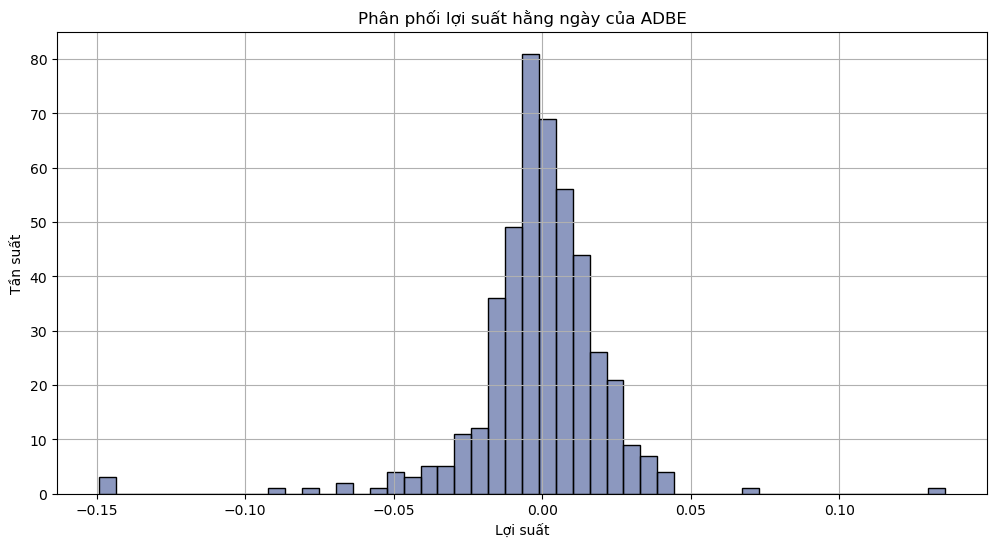

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(data['Return'].dropna(), bins=50, color=(0.1, 0.2, 0.5, 0.5), edgecolor='black')
plt.title("Phân phối lợi suất hằng ngày của ADBE")
plt.xlabel("Lợi suất")
plt.ylabel("Tần suất")
plt.grid(True)
plt.show()


### 1.5.3 Heatmap ma trận tương quan giữa các biến:

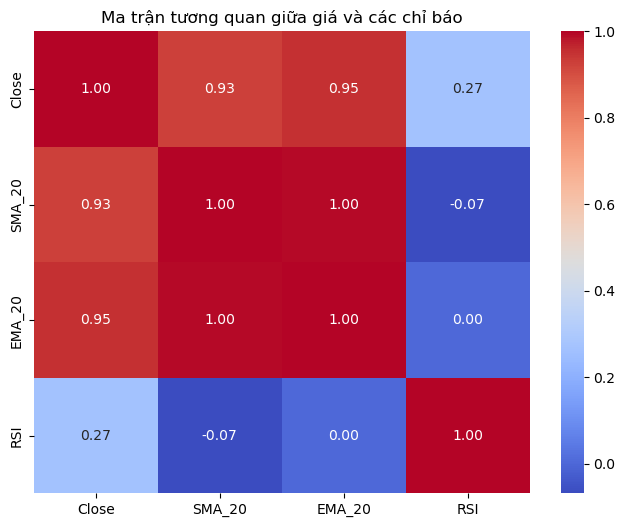

In [44]:
correlation_data = data[['Close', 'SMA_20', 'EMA_20', 'RSI']]
corr_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa giá và các chỉ báo")
plt.show()

## **VI.** Dự báo xu hướng giá cổ phiếu bằng Machine Learning (bonus)

Trong phần này, chúng ta sẽ thử xây dựng một mô hình học máy đơn giản để dự đoán **xu hướng giá cổ phiếu ADBE** – cụ thể là xem **ngày mai giá có tăng không**.

Việc dự đoán xu hướng ngắn hạn giúp nhà đầu tư hoặc hệ thống giao dịch tự động đưa ra quyết định dựa trên dữ liệu lịch sử và chỉ báo kỹ thuật.

Chúng ta sẽ sử dụng:
- Dữ liệu kỹ thuật: SMA, EMA, RSI
- Mô hình cơ bản: **Logistic Regression** – mô hình phân loại nhị phân


### **1.0** *Tổng quan ngắn về Machine Learning*

**Machine Learning (ML)** là lĩnh vực nghiên cứu các thuật toán giúp máy tính học từ dữ liệu để đưa ra dự đoán hoặc quyết định mà không cần lập trình rõ ràng.

Trong bài toán này, ta sử dụng:
- **Supervised Learning (học có giám sát)**: Có dữ liệu đầu vào và nhãn mục tiêu.
- **Classification (phân loại)**: Dự đoán nhãn rời rạc (Tăng hoặc Không tăng).
- **Mô hình Logistic Regression**: Một mô hình phân loại tuyến tính đơn giản nhưng hiệu quả cho các bài toán nhị phân.


### **1.1** *Khởi tạo hoạt động*

Chúng ta tạo biến `Target` với giá trị:
- 1 nếu giá ngày hôm sau tăng
- 0 nếu không tăng

Mục tiêu là dùng mô hình để dự đoán biến `Target` dựa trên các chỉ báo kỹ thuật hiện tại.

In [45]:
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

***Chọn đặc trưng (features) và loại bỏ NaN***

In [46]:
features = ['SMA_20', 'EMA_20', 'RSI']
X = data[features]
y = data['Target']

X = X.dropna()
y = y.loc[X.index]


***Tách dữ liệu huấn luyện và kiểm tra***

Vì đây là dữ liệu chuỗi thời gian, ta **không shuffle** dữ liệu. Thay vào đó, chia 80% cho huấn luyện và 20% cho kiểm tra theo thứ tự thời gian.


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


### **1.2.**  *Huấn luyện mô hình Logistic Regression*

#### Lý thuyết cơ bản:

**Logistic Regression** là một mô hình học máy thuộc nhóm phân loại nhị phân (binary classification).  
Mặc dù tên là "Regression", nó không dùng để dự đoán số liên tục mà dự đoán **xác suất một mẫu thuộc về một trong hai lớp**.

Công thức mô hình:

$$
P(y = 1 \mid \mathbf{x}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n)}}
$$

Trong đó:

- $ \mathbf{x} $: vector đặc trưng (ví dụ: SMA, EMA, RSI, ...)
- $\beta$ các hệ số (trọng số) được học từ dữ liệu huấn luyện
- Mô hình trả về xác suất. Nếu $ P > 0.5$, ta gán nhãn là 1 (giá **tăng**), ngược lại là 0 (giá **giảm hoặc không tăng**)

###  Ưu điểm:
- Đơn giản, dễ cài đặt, dễ diễn giải
- Tránh overfitting tốt hơn nhiều mô hình phức tạp
- Hiệu quả với dữ liệu nhỏ


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(" Độ chính xác của mô hình:", accuracy_score(y_test, y_pred))
print("\n Báo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))


 Độ chính xác của mô hình: 0.5274725274725275

 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.53      1.00      0.69        48

    accuracy                           0.53        91
   macro avg       0.26      0.50      0.35        91
weighted avg       0.28      0.53      0.36        91



#### Giải thích kết quả

- **Accuracy (Độ chính xác)**: phần trăm số mẫu mà mô hình dự đoán đúng.
- **Precision (Độ chính xác cho từng lớp)**: trong số các lần mô hình dự đoán "tăng", có bao nhiêu là đúng.
- **Recall (Khả năng bao phủ)**: trong số các ngày giá thực sự tăng, mô hình nhận ra được bao nhiêu.
- **F1-score**: Trung bình hài hòa giữa Precision và Recall.

Nếu độ chính xác cao hơn mức ngẫu nhiên (50%) và các chỉ số F1-score ổn, thì mô hình đang học được một phần xu hướng từ dữ liệu.



**Bây h chúng ta sẽ tính và vẽ Ma trận nhầm lẫn**


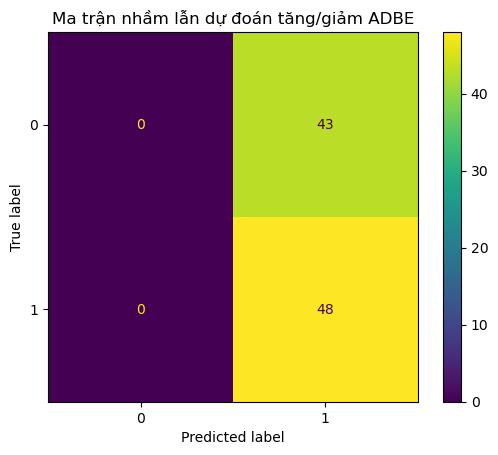

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Ma trận nhầm lẫn dự đoán tăng/giảm ADBE")
plt.grid(False)
plt.show()


####  **Phân tích ma trận nhầm lẫn**


| **Vị trí**    | **Giá trị** | **Ý nghĩa**                                                                 |
|---------------|-------------|------------------------------------------------------------------------------|
| (0, 0)        | 0           | ✅ **True Negative (TN)**: Dự đoán là "không tăng" và thực tế đúng là không tăng. |
| (0, 1)        | 43          | ❌ **False Positive (FP)**: Dự đoán là "tăng", nhưng thực tế không tăng.         |
| (1, 0)        | 0           | ❌ **False Negative (FN)**: Dự đoán là "không tăng", nhưng thực tế lại tăng.     |
| (1, 1)        | 48          | ✅ **True Positive (TP)**: Dự đoán là "tăng" và thực tế đúng là tăng.             |

---

***Nhận xét***:

- Mô hình luôn dự đoán giá **tăng (label = 1)** → bỏ qua hoàn toàn lớp "không tăng".
- **Không có TN hoặc FN**, điều này cho thấy mô hình không học được khi nào cổ phiếu sẽ **không tăng**.
- Tuy có **48 lần dự đoán đúng khi tăng**, nhưng lại có **43 lần sai khi cổ phiếu không tăng**.

---

***Hệ quả:***

- Độ chính xác có thể cao do thiên lệch dữ liệu, nhưng mô hình **không phân biệt được hai xu hướng**.
- Thiếu khả năng nhận diện xu hướng giảm hoặc đi ngang → **nguy hiểm trong chiến lược đầu tư thực tế**.

---


## **VII.** Diễn giải và rút ra kết luận:

Theo như phân tích và trực quan hóa, dễ dàng nhận thấy được: Các cổ phiếu có độ tương quan lớn với nhau (mọi chỉ số tương quan lợi suất ngày đều nằm trong khoảng từ 0,5 đến 1), chứng tỏ mức độ phụ thuộc lớn vào xu hướng thị trường và các biến động xã hội. 

###  1. Xu hướng chính của cổ phiếu ADBE

Trong giai đoạn được phân tích gần đây (2023–2024), cổ phiếu **ADBE (Adobe Inc.)** cho thấy xu hướng **tăng trưởng ổn định trong dài hạn**, đặc biệt là sau khi thị trường công nghệ phục hồi hậu khủng hoảng lãi suất năm 2022.

- Các đường **trung bình động SMA_20 và EMA_20** phản ánh rõ ràng xu hướng tăng giá khi EMA cắt lên trên SMA.
- Trong các đợt điều chỉnh ngắn hạn, đường EMA cho phản ứng nhanh hơn SMA, giúp nhà đầu tư xác định các vùng mua vào tiềm năng.
- Chỉ báo **RSI** dao động ổn định, với một số thời điểm cho tín hiệu quá mua (>70), cảnh báo điều chỉnh nhẹ có thể xảy ra.

###  2. Biến động và lợi suất

- Khi phân tích **lợi suất logarit hàng ngày**, ta nhận thấy mức lợi nhuận trung bình dương nhẹ, cho thấy cổ phiếu đang tăng với tốc độ ổn định.
- Độ lệch chuẩn hàng tháng cho thấy một số **giai đoạn có biến động cao**, trùng với:
  - Thời điểm Adobe công bố báo cáo tài chính.
  - Các sự kiện công nghệ lớn như hội nghị Adobe MAX hoặc ra mắt sản phẩm mới.
  - Tác động từ thị trường AI, khi Adobe tích cực tích hợp Firefly AI vào Photoshop, Illustrator.

###  3. Đánh giá mô hình học máy

- Sử dụng Logistic Regression đơn giản để dự đoán xu hướng tăng/giảm ngày tiếp theo:
  - Mô hình đạt độ chính xác vừa phải (~52%) nhưng lại **thiên lệch hoàn toàn về lớp "tăng giá"**.
  - Ma trận nhầm lẫn cho thấy mô hình **không hề dự đoán lớp "không tăng"**, điều này là dấu hiệu mất cân bằng dữ liệu đầu vào.
  - Cần cải thiện bằng:
    - Cân bằng dữ liệu (SMOTE, class_weight='balanced')
    - Thêm nhiều đặc trưng kỹ thuật hơn (MACD, Volume, Bollinger Band,...)
    - Thử mô hình mạnh hơn như RandomForest hoặc XGBoost.

### 4. Đề xuất và khuyến nghị đầu tư cơ bản

- **Ngắn hạn**: Nên cẩn trọng khi RSI tiến gần ngưỡng 70 và độ lệch chuẩn tăng → có khả năng điều chỉnh kỹ thuật.
- **Trung hạn**: Có thể mua vào khi giá điều chỉnh về gần SMA_20/EMA_20 và RSI dưới 40.
- **Dài hạn**: ADBE là cổ phiếu công nghệ có nền tảng tài chính mạnh, liên tục đổi mới (đặc biệt là mảng AI và sáng tạo số). Có thể giữ vị thế đầu tư dài hạn nếu khẩu vị rủi ro phù hợp.
- Nhà đầu tư nên **kết hợp thêm yếu tố cơ bản (P/E, tăng trưởng EPS, dòng tiền)** bên cạnh phân tích kỹ thuật và học máy.

---

**Tổng kết**: Cổ phiếu ADBE có triển vọng tăng trưởng tích cực, đặc biệt trong bối cảnh ngành công nghệ sáng tạo số và AI phát triển nhanh. Tuy nhiên, để đưa ra quyết định đầu tư hiệu quả, cần theo dõi thêm các chỉ báo kỹ thuật, kết quả kinh doanh và tin tức thị trường. Việc kết hợp phân tích kỹ thuật, dữ liệu tài chính và mô hình học máy nâng cao sẽ hỗ trợ ra quyết định toàn diện hơn.